## Практическое задание №2 к курсу "Введение в нейронные сети"

#### В данном задании попробовал разобрать Трансформеры

#### Архитектура Transformer была разработана в 2017 году в Гугле, описание можно найти в статье Attention Is All You Need  https://arxiv.org/abs/1706.03762

Используется в основном в области обработки естественного языка (natural language processing (NLP)). Вспоминая про рекурентные нейронные сети (recurrent neural networks (RNNs)), которые тоже используются для обработки NLP, отметим отличия. Если RNNs требует подачи обрабатываемого текста по порядку, то в случае Трансформеров это не обязательно. Т. е. Трансформерам не нужно обрабатывать начало предложения до того, как он обработает конец. Эта особенность дает возможность распараллелить обработку при обучении.

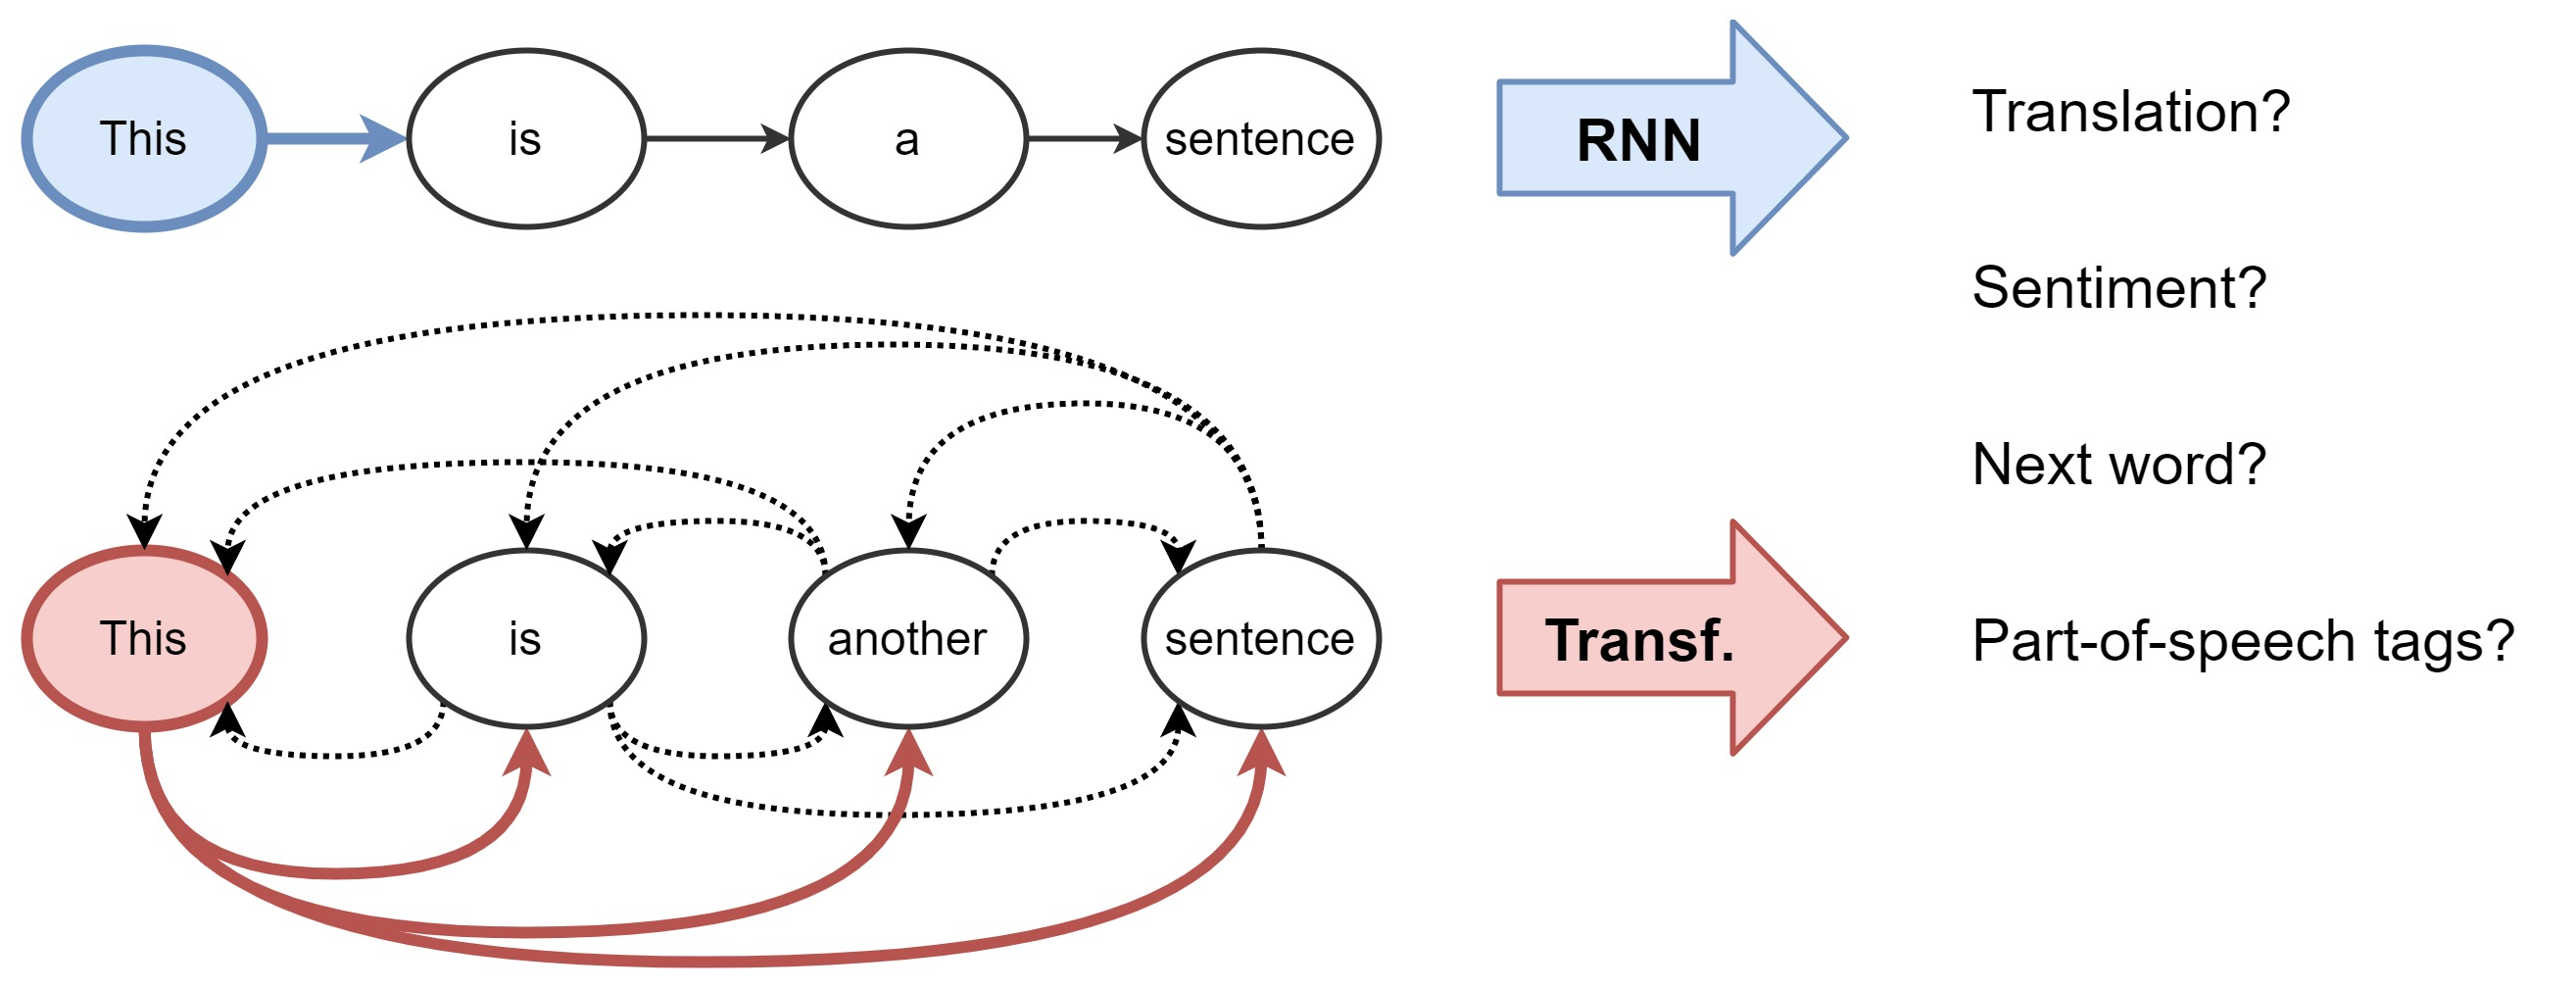


До появления трансформеров, большинство современных систем обработки естественного языка полагались на рекуррентные нейронные сети (RNN), такие как LSTM , с дополнительными механизмами attention. Трансформеры построены на этих технологиях attention. В Google пишут:" we introduce the Transformer, a novel neural network architecture based on a self-attention mechanism that we believe to be particularly well suited for language understanding."

Трансформеры были изначально разработаны для машинного перевода, но вскоре заменили RNN в основных задачах NLP. В архитектуру заложен новый подход к обучению представлений: полностью избавившись от рекуррентности, трансформеры для каждого слова строят признаки, используя для этого механизм внимания (attention mechanism; attention), чтобы выявить важность всех прочих слов в предложении для данного слова. Таким образом, построенные признаки для данного слова — просто сумма линейных преобразований признаков всех слов, взвешенных этой "важностью".

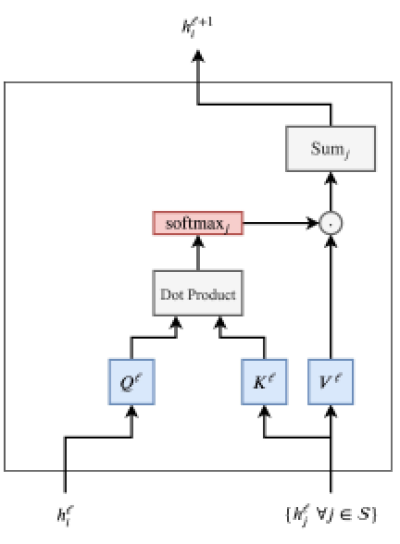

attention mechanism

## Self-Attention 

Self-Attention — разновидность механизма внимания, задачей которой является выявление закономерности только между входными данными.

Данная методика показала себя настолько эффективной в задаче машинного перевода, что позволила отказаться от использования RNN и заменить их на обычные нейронные сети в комбинации с механизмом Self-attention в архитектуре трансформер.

Это позволило ускорить работу алгоритма, поскольку ранее предложение обрабатывалось последовательно при помощи RNN. При использовании трансформера каждое слово в предложении обрабатывается может обрабатываться параллельно.

Основным отличием Self-Attention от обобщенного механизма внимания является, что он делает заключения о зависимостях исключительно между входными данными.

Рассмотрим предложение The animal didn't cross the street because it was too tired и результат работы алгоритма Self-attention для слова it. Полученный вектор соответствует взаимосвязи слова it со всеми остальными словам в предложении.

Из визуализации вектора можно заметить, что механизм Self-attention обнаружил взаимосвязь между словами it и animal. Этот результат можно интуитивно объяснить с человеческой точки зрения, что позволяет алгоритмам машинного обучения, использующим данный подход, лучше решать задачу принимая во внимание контекстные взаимосвязи.

Также Self-Attention успешно применяется применяется в GAN сетях, в частности в алгоритме SAGAN. 

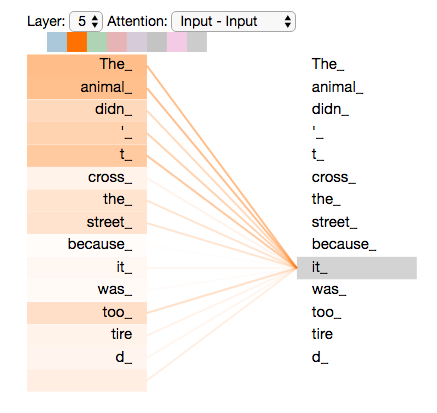
Пример работы Self-Attention



Ключевая проблема, из-за которой архитектура трансформеров устроена именно так, как устроена, заключается вот в чём: значения признаков для каждого слова после применения механизма внимания могут быть очень разными по величине. Во-первых (1), это может быть из-за слишком "острых пиков" или, напротив, равномерности в распределении внимания . Во-вторых (2), мы для каждого слова склеиваем выходы нескольких голов, и они также могут быть очень разными по "масштабу". Поэтому в итоговом векторе $h_{i}^{\ell+1}$ разброс значения может быть большим. По принятым в машинном обучении практикам, здесь в цепочку вычислений есть смысл добавить нормализующий слой (normalization layer).

Проблему (2) трансформеры решают с помощью LayerNorm, который нормализовает и выучивает аффинное преобразование на уровне признаков. Кроме того, деление внимания-на-скалярном-произведении на квадратный корень из размерности помогает противодействовать проблеме (1).

Наконец, авторы предлагают ещё один фокус, чтобы справиться с проблемой масштабирования: значения на каждой позиции преобразовывают двухслойным перцептроном с особой структурой. После применения многоголового внимания, они проецируют  $h_{i}^{\ell+1}$ на (абсурдно) высокую размерность с помощью обучаемых весов, где затем происходит преобразование нелинейной функцией активации ReLU, а потом значения проецируют в исходную размерность, за которой происходит очередная нормализация:
$$h_i^{\ell+1} = \text{LN} \left( \text{MLP} \left( \text{LN} \left( h_i^{\ell+1} \right) \right) \right)$$

## Архитектура

Трансформер состоит из двух основных компонентов: набора кодеров, соединенных вместе и набора декодеров, соединенных вместе. Функция каждого кодера заключается в обработке его входных векторов для генерации так называемых кодировок, которые содержат информацию о частях входов, которые имеют отношение друг к другу. Он передает свой набор сгенерированных кодировок следующему кодеру в качестве входных данных. Каждый декодер делает обратное, беря все кодировки и обрабатывая их, используя их встроенную контекстную информацию для генерации выходной последовательности. Для достижения этого каждый кодер и декодер использует механизм внимания, который для каждого входа взвешивает релевантность каждого входа и соответственно извлекает из них информацию при создании вывода. Каждый декодер также имеет дополнительный механизм внимания, который извлекает информацию из выходных данных предыдущих декодеров, прежде чем декодер извлекает информацию из кодировок. Как кодеры, так и декодеры имеют конечную нейронную сеть с прямой связью для дополнительной обработки выходных данных, а также содержат остаточные соединения и этапы нормализации уровня.
### кодер (Encoder)

Каждый кодировщик состоит из двух основных компонентов: механизма самообслуживания и нейронной сети с прямой связью. Механизм самовосприятия принимает набор входных кодировок от предыдущего кодера и взвешивает их релевантность друг к другу, чтобы сгенерировать набор выходных кодировок. Затем нейронная сеть с прямой связью дополнительно обрабатывает каждую выходную кодировку отдельно. Эти выходные кодировки, наконец, передаются следующему кодеру в качестве входных данных, а также декодерам.

Первый кодер принимает информацию о положении и встраиванияи входной последовательности в качестве входных данных, а не кодирования. Позиционная информация необходима Трансформеру, чтобы использовать порядок последовательности, потому что никакая другая часть Трансформера не использует это.
### декодер (Decoder)

Каждый декодер состоит из трех основных компонентов: механизм самовосприятия, механизм внимания над кодировками и нейронная сеть с прямой связью. Декодер функционирует аналогично кодеру, но вставлен дополнительный механизм внимания, который вместо этого извлекает соответствующую информацию из кодировок, сгенерированных кодерами.

Как и первый кодер, первый декодер принимает информацию о положении и встраивании выходной последовательности в качестве входных данных, а не кодирования. Поскольку преобразователь не должен использовать текущий или будущий выход для прогнозирования выхода, выходная последовательность должна быть частично замаскирована, чтобы предотвратить этот обратный поток информации. За последним декодером следует окончательное линейное преобразование и слой softmax для получения вероятностей вывода по словарю. 

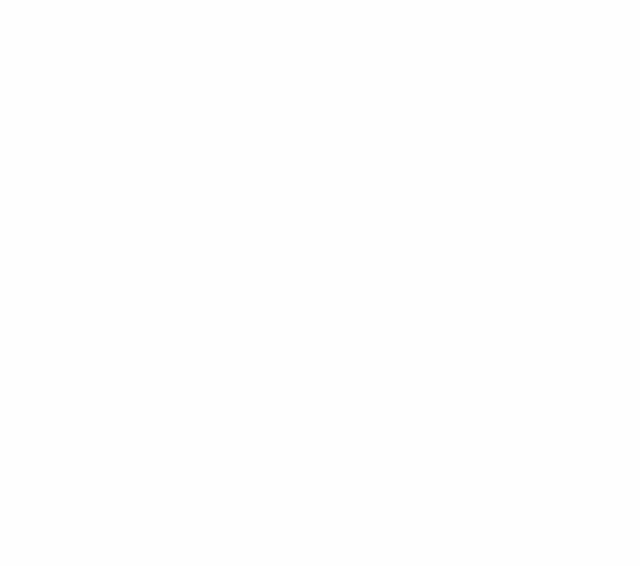

### Scaled Dot-Product Attention
Цель механизма внимания - использовать набор кодировок для включения контекста в последовательность. Механизм внимания принимает набор запросов и набор пар ключ-значение для генерации выходных данных, где запросы генерируются линейными преобразованиями векторов в последовательности, а ключи и значения генерируются линейными преобразования кодировок. Самоуважение относится к ситуации, когда все запросы, ключи и значения создаются с использованием кодировок последовательности. Масштабированное точечное произведение умножает запросы на ключи, делит на коэффициент масштабирования и принимает значение softmax и, наконец, использует результат для вычисления взвешенной суммы значений, соответствующих ключам, генерируя кодировку исходной последовательности. Если **Q**, **K** и **V** являются матрицами, содержащими запросы, ключи и значения соответственно и **n** это размерность запросов и ключей, тогда результат этого механизма внимания будет: 



## Сравнение с другими моделями

В статье https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html результаты тестов различных моделей. На графике видно, что Transformer превосходит как рекуррентные, так и сверточные модели по академическим тестам перевода с английского на немецкий и с английского на французский. Помимо более высокого качества перевода, Transformer требует меньше вычислений для обучения и гораздо лучше подходит для современного оборудования машинного обучения, ускоряя обучение на порядок.

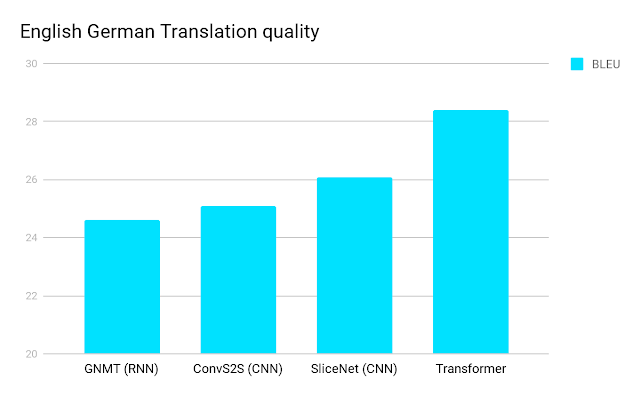

Баллы BLEU (чем выше, тем лучше) отдельных моделей на стандартном тесте перевода с английского на немецкий WMT newstest2014.

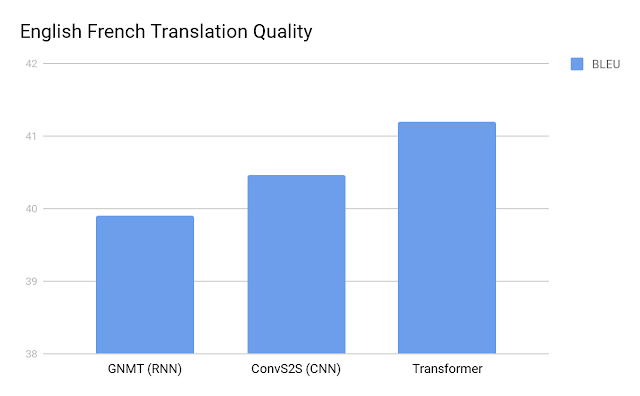

BLEU scores (higher is better) of single models on the standard WMT newstest2014 English to French translation benchmark.

## Резюме

К 2019 году архитектура трансформер стала активной областью исследований, ее все чаще начинают применять. Первоначально созданный для NLP. Он нашел широкое применение и в других областях, например, для задач машинного перевода, прогнозирования временных рядов и др. 

Использованная литература:

https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)

https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html

https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%85%D0%B0%D0%BD%D0%B8%D0%B7%D0%BC_%D0%B2%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D1%8F

https://graphdeeplearning.github.io/post/transformers-are-gnns/

https://habr.com/ru/post/491576/